### This is a example tutorial about how to use unav navigation

In [ ]:
# install the unav package, and gdown to download sample data from google drive
!pip install --upgrade unav --quiet
!pip install gdown --quiet

#### The following code will download our demo data and arrange them into proper structure
###### You can always manully download them use link provided by error massage if it exceed the downloading limit

In [2]:
from src.demo import DataHandler
import os

# Define the new root directory as the current working directory and create a data handler object
new_root_dir = os.getcwd()

datahandler = DataHandler(new_root_dir)

In [ ]:
# Download our sample data
datahandler.download_data()

In [ ]:
# Rearrange data structure to make it compatible with unav
datahandler.rearrange_data()

#### Import navigation modules from our unav package

In [3]:
# Doing this to get ride the error of jupyter notebook
import builtins
if not hasattr(builtins, 'exit'):
    builtins.exit = quit
    
# Load modules
from unav import load_data

2024-06-26 17:59:51,132 - INFO - Created a temporary directory at /tmp/tmpynhs4m5i
2024-06-26 17:59:51,133 - INFO - Writing /tmp/tmpynhs4m5i/_remote_module_non_scriptable.py
2024-06-26 17:59:51,171 - INFO - Loading faiss with AVX2 support.
2024-06-26 17:59:51,171 - INFO - Could not load library with AVX2 support due to:
ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")
2024-06-26 17:59:51,172 - INFO - Loading faiss.
2024-06-26 17:59:51,280 - INFO - Successfully loaded faiss.


In [4]:
import yaml
# Load data
with open(os.path.join(new_root_dir, "configs", "hloc.yaml"), 'r') as file:
    config = yaml.safe_load(file)
    
map_data=load_data(config)

2024-06-26 17:59:59,004 - unav.loader.data_loader - INFO - ============Loading map=============
2024-06-26 17:59:59,004 - INFO - ============Loading map=============
2024-06-26 18:00:05,797 - unav.loader.data_loader - INFO - Loaded 2198 keyframes data
2024-06-26 18:00:05,797 - INFO - Loaded 2198 keyframes data
2024-06-26 18:00:05,930 - unav.loader.data_loader - INFO - Loaded 32044 local descriptors
2024-06-26 18:00:05,930 - INFO - Loaded 32044 local descriptors
2024-06-26 18:00:28,293 - unav.loader.data_loader - INFO - Loaded 32044 global descriptors
2024-06-26 18:00:28,293 - INFO - Loaded 32044 global descriptors
2024-06-26 18:00:28,841 - unav.loader.data_loader - INFO - Loaded 42 anchor points and 27221 boundaries
2024-06-26 18:00:28,841 - INFO - Loaded 42 anchor points and 27221 boundaries
2024-06-26 18:00:28,895 - unav.loader.data_loader - INFO - Loaded 1 interwaypoints
2024-06-26 18:00:28,895 - INFO - Loaded 1 interwaypoints
2024-06-26 18:00:28,907 - unav.loader.data_loader - INFO

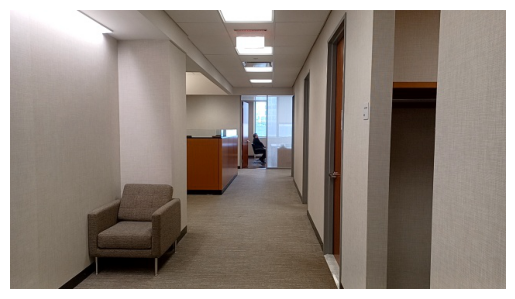

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load demo query image
example_image_url = './demo_query.png'
example_image = cv2.imread(example_image_url)

# Display the image
plt.imshow(example_image)
plt.axis('off')  # Hide axes
plt.show()


#### The following functions doing localization and navigation

In [6]:
# Load modules
from unav import localization

# Localize the query image and return 2D location and orientation related to floorplan
localizer=localization(new_root_dir,map_data,config)

pose=localizer.get_location(example_image)

print(f"The estimated query location is:[{int(pose[0])},{int(pose[1])}], angle is {int(pose[2])}")

===> Building model


/home/unav/miniconda3/envs/UNav/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/unav/miniconda3/envs/UNav/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2024-06-26 18:01:01,384 - unav.track.hierarchical_localization - INFO - Maps and connections loaded successfully.
2024-06-26 18:01:01,384 - INFO - Maps and connections loaded successfully.
2024-06-26 18:01:01,385 - unav.track.hierarchical_localization - INFO - Start image retrieval
2024-06-26 18:01:01,385 - INFO - Start image retrieval


File /home/unav/Desktop/unav/src/third_party/global_feature/pytorch_NetVlad/netvlad_parameters/log/paper/checkpoints/checkpoint.pth.tar already exists.
=> loading checkpoint '/home/unav/Desktop/unav/src/third_party/global_feature/pytorch_NetVlad/netvlad_parameters/log/paper/checkpoints/checkpoint.pth.tar'
=> loaded checkpoint '/home/unav/Desktop/unav/src/third_party/global_feature/pytorch_NetVlad/netvlad_parameters/log/paper/checkpoints/checkpoint.pth.tar' (epoch 25)
File /home/unav/miniconda3/envs/UNav/lib/python3.8/site-packages/unav/third_party/local_feature/SuperPoint_SuperGlue/extractors/SuperGluePretrainedNetwork/models/weights/superpoint_v1.pth already exists.
Loaded SuperPoint model


2024-06-26 18:01:03,084 - unav.track.hierarchical_localization - INFO - Current map updated to: LightHouse+6th_floor+00003.h5 with neighbors ['LightHouse+6th_floor+00015.h5', 'LightHouse+6th_floor+00012.h5', 'LightHouse+6th_floor+00008.h5', 'LightHouse+6th_floor+00007.h5', 'LightHouse+6th_floor+00011.h5']
2024-06-26 18:01:03,084 - INFO - Current map updated to: LightHouse+6th_floor+00003.h5 with neighbors ['LightHouse+6th_floor+00015.h5', 'LightHouse+6th_floor+00012.h5', 'LightHouse+6th_floor+00008.h5', 'LightHouse+6th_floor+00007.h5', 'LightHouse+6th_floor+00011.h5']
2024-06-26 18:01:03,084 - unav.track.hierarchical_localization - INFO - Only consider calculating maps: LightHouse+6th_floor+00003.h5 with neighbors ['LightHouse+6th_floor+00015.h5', 'LightHouse+6th_floor+00012.h5', 'LightHouse+6th_floor+00008.h5', 'LightHouse+6th_floor+00007.h5', 'LightHouse+6th_floor+00011.h5']
2024-06-26 18:01:03,084 - INFO - Only consider calculating maps: LightHouse+6th_floor+00003.h5 with neighbors 

Loaded LightGlue model


2024-06-26 18:01:10,348 - unav.track.hierarchical_localization - INFO - Matching local feature
2024-06-26 18:01:10,348 - INFO - Matching local feature
/home/unav/miniconda3/envs/UNav/lib/python3.8/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
2024-06-26 18:01:11,320 - unav.track.hierarchical_localization - INFO - Start geometric verification
2024-06-26 18:01:11,320 - INFO - Start geometric verification
/home/unav/miniconda3/envs/UNav/lib/python3.8/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)
2024-06-

The estimated query location is:[3212,2123], angle is 182


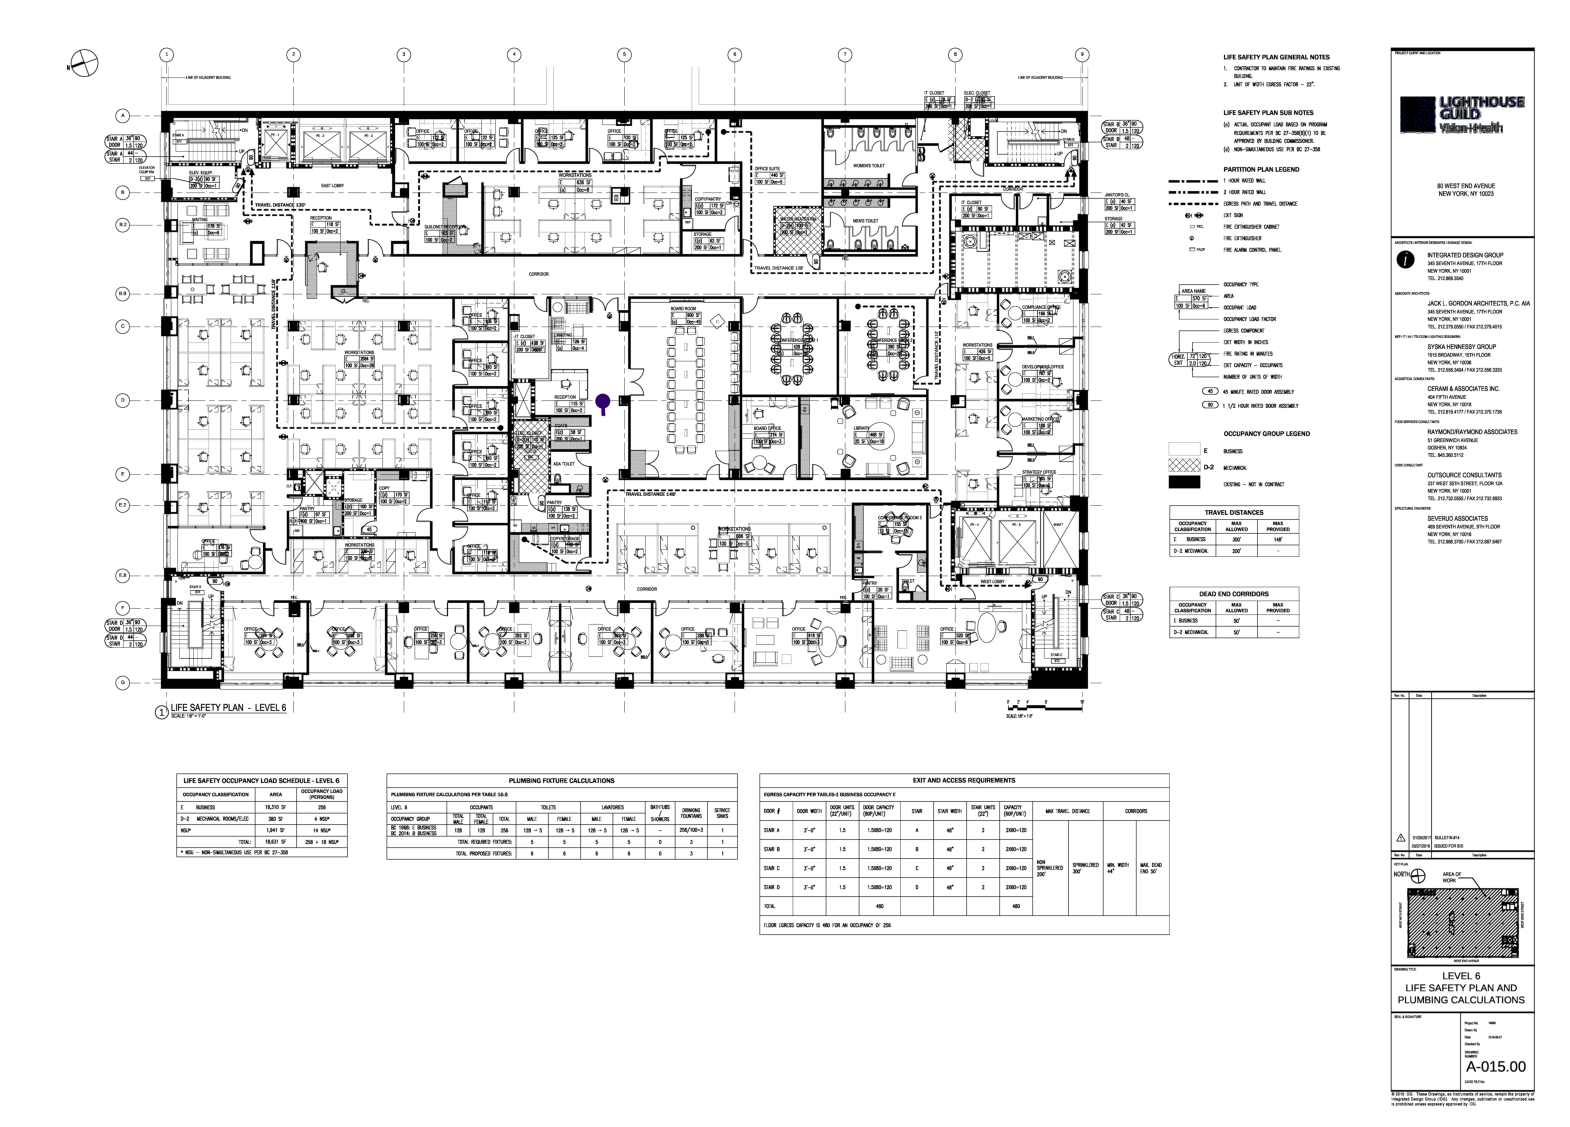

In [7]:
floorplan=datahandler.show_localization(pose)

# Display the image using matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(floorplan)
plt.axis('off')  # Hide axes
plt.show()

Output()

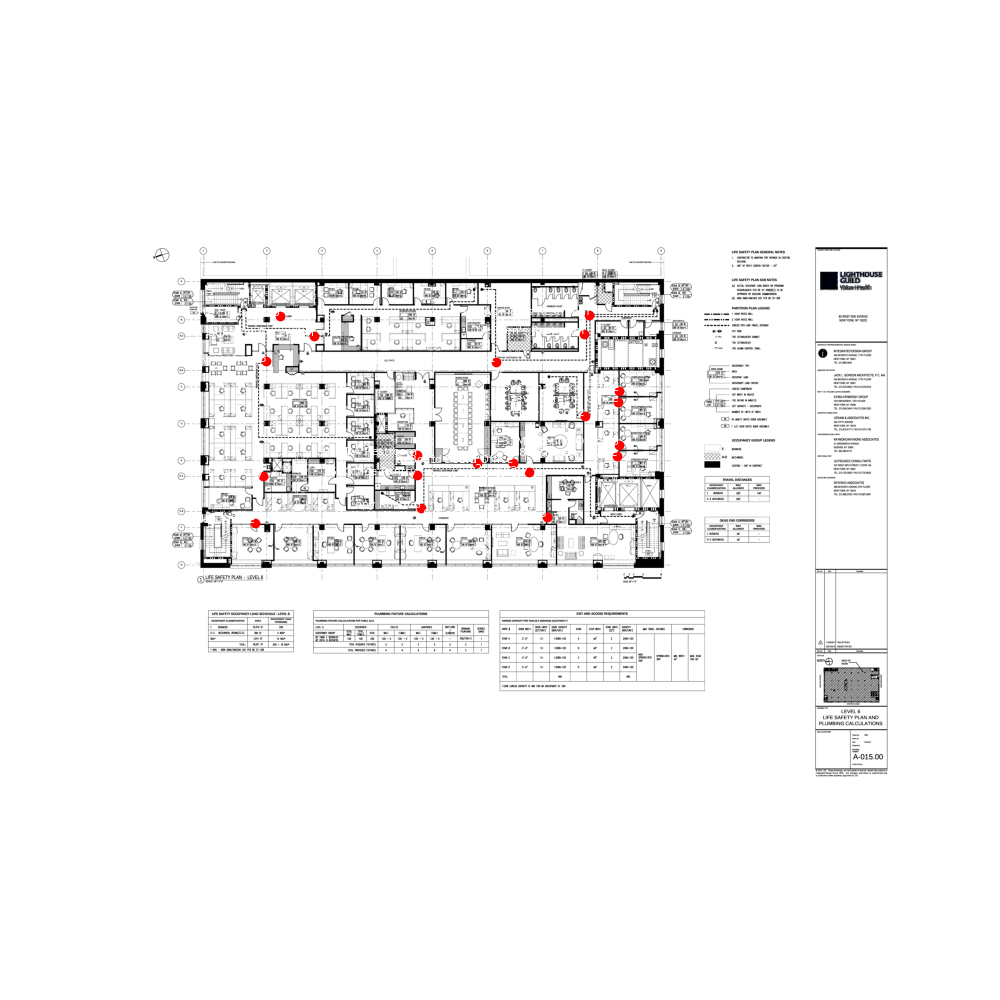

In [8]:
# Initialize interactive plot
%matplotlib widget

datahandler.select_destination(config, map_data)

# Click red dots to pick a destination

In [9]:

# Load modules
from unav import trajectory

# Create a trajectory maker object
trajectory_maker = trajectory(map_data)

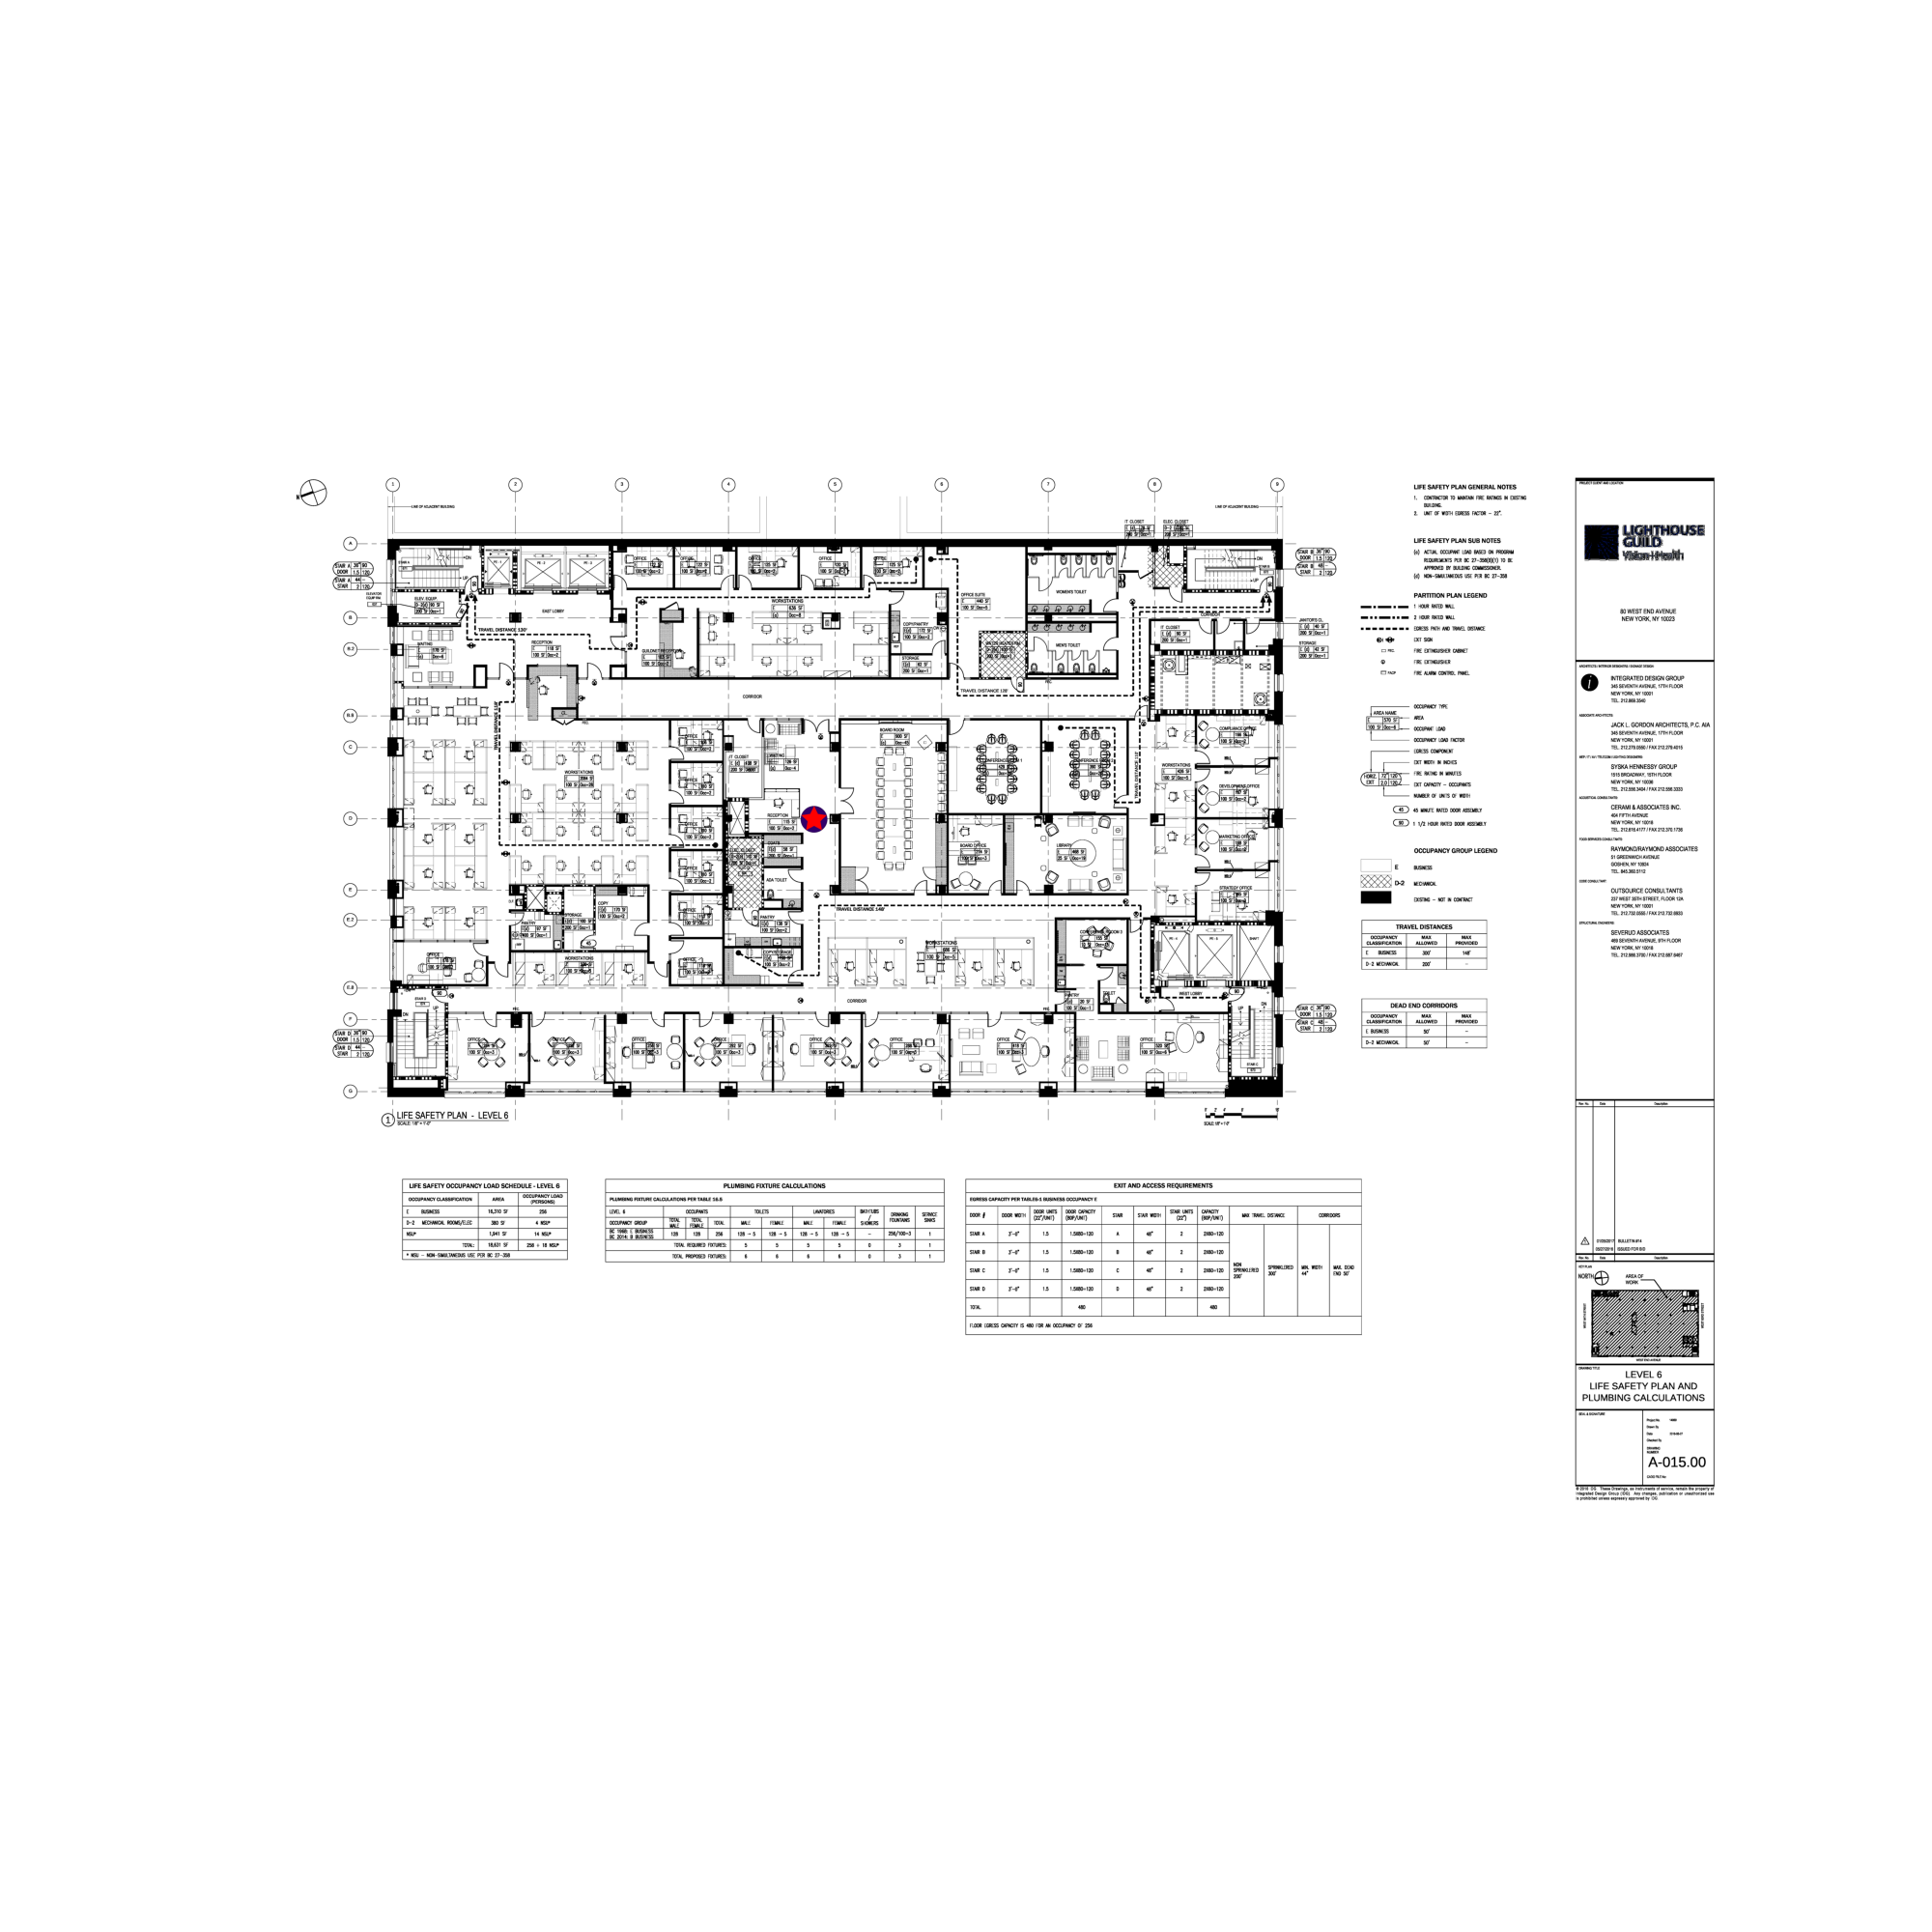

In [11]:
# Get the trajectory segments from estimated location to selected destination

# We support multiple places navigation, but this demo shows single floor navigation, so we input "6th_floor" here, 
# which is the same floor of current pose
path_list = trajectory_maker.calculate_path(pose[:2], datahandler.selected_destination_ID, "6th_floor")
paths=[pose[:2]]+path_list

trajectory_floorplan=datahandler.plot_trajectory(paths)
plt.figure(figsize=(20, 20))
plt.imshow(trajectory_floorplan)
plt.axis('off')
plt.show()